Từ trước đến nay, bạn luôn sử dụng Gradient Descent để cập nhật các thông số và giảm thiểu cost. Trong lab này, bạn sẽ học các phương pháp tối ưu hóa nâng cao hơn giúp tăng tốc độ học, và thậm chí có thể cho bạn giá trị cuối cùng tốt hơn cho hàm mất mát. Có một thuật toán tối ưu hóa tốt có thể là sự khác biệt giữa chờ đợi nhiều ngày so với chỉ mất vài giờ để có được kết quả tốt.

Gradient descent giảm trên hàm mất mát $ J $. Hãy nghĩ về việc thực hiện điều này:
<img src="images/cost.jpg" style="width:650px;height:300px;">
<caption><center> <u> **Hình 1** </u>: **Giảm thiểu cost giống tìm điểm thấp nhất trên núi**<br> Ở mỗi bước của huấn luyện, bạn cập nhật các tham số theo một hướng nhất định để cố gắng đạt được điểm thấp nhất có thể.</center></caption>

**Kí hiệu**: Như thường lệ, $\frac{\partial J}{\partial a } = $ `da` cho bất kỳ biến `a`.

Để bắt đầu, hãy chạy đoạn code sau để nhập các thư viện bạn cần.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

C:\Users\Nguyễn Hoài Nam\OneDrive\Machine Learning\Lab_Exercise_MLP303x_Regression\Lab 6\opt_utils.py:76: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
C:\Users\Nguyễn Hoài Nam\OneDrive\Machine Learning\Lab_Exercise_MLP303x_Regression\Lab 6\opt_utils.py:77: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


## 1 - Gradient Descent

Phương pháp tối ưu hóa đơn giản trong machine learning là gradient descent (GD). Khi bạn thực hiện các bước gradient đối với tất cả $ m $ mẫu dữ liệu (samples) trên mỗi bước, nó còn được gọi là Batch Gradient Descent.

**Task 1**: Thực hiện quy tắc cập nhật gradient descent. Quy tắc gradient descent đối với $l = 1, ..., L$ là: 
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

trong đó L là số lớp và $\alpha$ là learning rate. Tất cả các tham số nên được lưu trữ trong từ điển `parameters`. Lưu ý rằng trình lặp `l` bắt đầu từ 0 trong vòng lặp `for` trong khi các tham số đầu tiên là $ W ^ {[1]} $ và $ b ^ {[1]} $. Bạn cần chuyển `l` thành `l+1` khi viết code.

In [4]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Cập nhật các tham số sử dụng gradient descent 1 bước
    
    Đối số:
    parameters -- dictionary của python chứa các tham số cần cập nhật:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- dictionary của python chứa các gradient để cập nhật từng tham số:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- tốc độ học, số vô hướng.
    
    Trả về:
    parameters -- dictionary của python chứa các tham số đã cập nhật 
    """

    L = len(parameters) // 2 # số lớp trong mạng nơ-ron

    # Cập nhật quy luật cho từng tham số
    for l in range(L):
        ### BẮT ĐẦU CODE Ở ĐÂY ### (khoảng 2 dòng)
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads['dW' + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads['db' + str(l+1)]
        ### KẾT THÚC CODE Ở ĐÂY ###
        
    return parameters

In [5]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()

parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 = [[ 1.74604067]
 [-0.75184921]]
W2 = [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 = [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


**Kỳ vọng đầu ra**:

<table> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]] </td> 
    </tr> 
    
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.74604067]
 [-0.75184921]] </td> 
    </tr> 
    
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]] </td> 
    </tr> 
    
    <tr>
    <td > **b2** </td> 
           <td > [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]] </td> 
    </tr> 
</table>


Một biến thể của điều này là Stochastic Gradient Descent (SGD), tương đương với mini-batch gradient descent, trong đó mỗi mini-batch chỉ có 1 ví dụ. Quy tắc cập nhật mà bạn vừa thực hiện sẽ không thay đổi. Điều thay đổi là bạn sẽ chỉ tính toán các gradient trên một ví dụ huấn luyện tại một thời điểm thay vì trên toàn bộ tập huấn luyện. Các ví dụ code bên dưới minh họa sự khác biệt giữa Stochastic Gradient Descent và (batch) gradient descent.

- **(Batch) Gradient Descent**:

``` python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Lan truyền xuôi
    a, caches = forward_propagation(X, parameters)
    # Tính cost.
    cost = compute_cost(a, Y)
    # Lan truyền ngược.
    grads = backward_propagation(a, caches, parameters)
    # Cập nhật tham số.
    parameters = update_parameters(parameters, grads)
        
```

- **Stochastic Gradient Descent**:

```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):
        # Lan truyền xuôi
        a, caches = forward_propagation(X[:,j], parameters)
        # Tính cost
        cost = compute_cost(a, Y[:,j])
        # Lan truyền ngược
        grads = backward_propagation(a, caches, parameters)
        # Cập nhật tham số.
        parameters = update_parameters(parameters, grads)
```


Trong Stochastic Gradient Descent, bạn chỉ sử dụng 1 ví dụ huấn luyện trước khi cập nhật gradient. Nếu tập huấn luyện lớn, SGD có thể nhanh hơn. Tuy nhiên, các thông số sẽ "dao động" về phía cực tiểu hơn là hội tụ một cách trôi chảy. Dưới đây là minh họa cho điều này:

<img src="images/kiank_sgd.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> **Hình 1** </u><font color='purple'>  : **SGD với GD**<br> "+" biểu thị mức tối thiểu của cost. SGD dẫn đến nhiều dao động để đạt được sự hội tụ. Nhưng mỗi bước tính toán cho SGD lại nhanh hơn rất nhiều so với GD, vì nó chỉ sử dụng một ví dụ huấn luyện (so với toàn bộ batch cho GD). </center></caption>

**Lưu ý** rằng việc triển khai SGD yêu cầu tổng cộng 3 vòng lặp:
1. Qua các lần lặp lại
2. Qua các ví dụ huấn luyện $m$ 
3. Qua các lớp (để cập nhật tất cả các tham số, từ $(W^{[1]},b^{[1]})$ tới $(W^{[L]},b^{[L]})$)

Trên thực tế, bạn thường sẽ nhận được kết quả nhanh hơn nếu không sử dụng toàn bộ tập huấn luyện hoặc chỉ một ví dụ huấn luyện để thực hiện mỗi lần cập nhật. Mini-batch gradient descent sử dụng một số ví dụ trung gian cho mỗi bước. Với mini-batch gradient descent, bạn lặp qua các mini-batch thay vì lặp qua các ví dụ huấn luyện riêng lẻ.

<img src="images/kiank_minibatch.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> **Hình 2** </u>: <font color='purple'>  **SGD với Mini-Batch GD**<br> "+" biểu thị mức tối thiểu của cost. Sử dụng các mini-batch trong thuật toán tối ưu hóa thường dẫn đến tối ưu hóa nhanh hơn. </center></caption>

<font color='blue'>
    
**Những điều bạn cần nhớ:**
    
- Sự khác biệt giữa gradient descent, mini-batch gradient descent và stochastic gradient descent là số lượng ví dụ bạn sử dụng để thực hiện bước cập nhật.
- Bạn phải điều chỉnh hyperparameter learning rate $\alpha$.
- Với kích thước mini-batch được biến đổi tốt, thường thì nó hoạt động tốt hơn so với gradient descent hoặc stochastic gradient descent (đặc biệt khi tập huấn luyện lớn). 

## 2 - Mini-Batch Gradient descent

Hãy tìm hiểu cách xây dựng các mini-batch từ tập huấn luyện (X, Y).

Có 2 bước:
- **Shuffle (Xáo trộn)**: Tạo phiên bản xáo trộn của tập huấn luyện (X, Y) như hình dưới đây. Mỗi cột X và Y đại diện cho một ví dụ huấn luyện. Lưu ý rằng xáo trộn ngẫu nhiên được thực hiện đồng bộ giữa X và Y. Như vậy, sau khi xáo trộn cột thứ $ i $ của X là ví dụ tương ứng với nhãn thứ $ i $ trong Y. Bước xáo trộn đảm bảo rằng các ví dụ sẽ được chia ngẫu nhiên thành các mini-batch khác nhau.

<img src="images/kiank_shuffle.png" style="width:550px;height:300px;">

- **Partition (Phân vùng)**: Phân vùng xáo trộn (X, Y) thành các mini-batch có kích thước `mini_batch_size` (ở đây là 64). Lưu ý rằng số lượng ví dụ huấn luyện không phải lúc nào cũng chia hết cho `mini_batch_size`. Mini-batch cuối cùng có thể nhỏ hơn, nhưng bạn không cần phải lo lắng về điều này. Khi mini-batch cuối nhỏ hơn toàn bộ `mini_batch_size` sẽ giống như sau:

<img src="images/kiank_partition.png" style="width:550px;height:300px;">

**Task 2**: Thực hiện `random_mini_batches`. Chúng tôi đã mã hóa phần shuffling cho bạn. Để giúp bạn thực hiện bước partition, chúng tôi cung cấp cho bạn đoạn code sau để chọn chỉ mục cho các mini-batch thứ $nhất$ và thứ $hai$:
```python
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]
...
```

Lưu ý rằng mini-batch cuối cùng có thể nhỏ hơn `mini_batch_size=64`. Giả sử $\lfloor s \rfloor$ đại diện cho $ s $ được làm tròn xuống số nguyên gần nhất (đây là `math.floor(s)` trong Python). Nếu tổng số ví dụ không phải là bội số của `mini_batch_size=64` thì sẽ có $\lfloor \frac{m}{mini\_batch\_size}\rfloor$ mini-batch với đầy đủ 64 ví dụ và số ví dụ trong mini-batch cuối cùng sẽ là ($m-mini_\_batch_\_size \times \lfloor \frac{m}{mini\_batch\_size}\rfloor$). 

In [24]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Tạo danh sách các minibatch ngẫu nhiên từ from (X, Y)
    
    Đối số:
    X -- dữ liệu đầu vào, có shape (kích thước đầu vào, số ví dụ)
    Y -- vectơ true "label" (1 cho chấm xanh / 0 cho chấm đỏ), có shape (1, số ví dụ)
    mini_batch_size -- kích thước của các mini-batch, số nguyên
    
    Trả về:
    mini_batches -- danh sách đồng bộ (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # đảm bảo các minibatch "ngẫu nhiên" như nhau
    m = X.shape[1]                  # số ví dụ huấn luyện
    mini_batches = []
        
    # Bước 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))
    #print ("shape of shuffled_Y: " + str(shuffled_Y.shape))

    # Bước 2: Partition (shuffled_X, shuffled_Y). Trừ trường hợp cuối.
    num_complete_minibatches = math.floor(m/mini_batch_size) # số minibatch của size mini_batch_size trong partitionning
    for k in range(0, num_complete_minibatches):
        ### BẮT ĐẦU CODE Ở ĐÂY ### (khoảng 2 dòng)
        mini_batch_X = shuffled_X[:,k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size : (k+1) * mini_batch_size]
        ### KẾT THÚC CODE Ở ĐÂY ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Xử lý trường hợp cuối  mini-batch cuối < mini_batch_size)
    if m % mini_batch_size != 0:
        ### BẮT ĐẦU CODE Ở ĐÂY ### (khoảng 2 dòng)
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size : ]
        ### KẾT THÚC CODE Ở ĐÂY ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [25]:
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]


**Kỳ vọng đầu ra**:

<table style="width:50%"> 
    <tr>
    <td > **shape of the 1st mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    
    <tr>
    <td > **shape of the 2nd mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    
    <tr>
    <td > **shape of the 3rd mini_batch_X** </td> 
           <td > (12288, 20) </td> 
    </tr>
    <tr>
    <td > **shape of the 1st mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 2nd mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 3rd mini_batch_Y** </td> 
           <td > (1, 20) </td> 
    </tr> 
    <tr>
    <td > **mini batch sanity check** </td> 
           <td > [ 0.90085595 -0.7612069   0.2344157 ] </td> 
    </tr>
    
</table>

<font color='blue'>

**Bạn cần nhớ**:
- Shuffling và Partitioning là hai bước cần thiết để xây dựng các mini-batch
- Lũy thừa của 2 thường được chọn làm kích thước mini-batch, ví dụ: 16, 32, 64, 128. 

## 3 - Momentum

Vì mini-batch gradient descent cập nhật tham số chỉ sau khi nhìn thấy một tập hợp con các ví dụ, hướng của bản cập nhật có một số phương sai và do đó, đường dẫn được thực hiện bởi mini-batch gradient descent sẽ "dao động" theo hội tụ. Sử dụng momentum có thể làm giảm các dao động này.

Momentum tính đến các gradient trong quá khứ để cập nhật một cách trơn tru. Chúng ta sẽ lưu trữ 'hướng' của các gradient trước đó trong biến $ v $. Về mặt hình thức, đây sẽ là giá trị trung bình có trọng số theo cấp số nhân của gradient ở các bước trước đó. Bạn cũng có thể coi $ v $ là "vận tốc" của một quả bóng lăn xuống dốc, xây dựng tốc độ (và momentum) theo hướng của gradient/độ dốc của ngọn đồi.


<img src="images/opt_momentum.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'>**Hình 3**</u><font color='purple'>: Các mũi tên màu đỏ chỉ hướng được thực hiện bởi một bước của mini-batch gradient descent. Các điểm màu xanh dương hiển thị hướng của gradient (đối với mini-batch hiện tại) ở mỗi bước. Thay vì chỉ tuân theo gradient, chúng ta để gradient ảnh hưởng đến $ v $ và sau đó thực hiện một bước theo hướng của $v$.<br> <font color='black'> </center>


**Task 3**: Khởi tạo velocity. Velocity $ v $ là một từ điển python cần được khởi tạo với các mảng số 0. Các khóa của nó cũng giống như các khóa trong dictionary `grads`, đó là:
cho $l =1,...,L$:
```python
v["dW" + str(l+1)] = ... #(mảng numpy của 0 có shape tương tự như parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(mảng numpy của 0 có shape tương tự như parameters["b" + str(l+1)])
```
**Lưu ý** rằng trình lặp l bắt đầu từ 0 trong vòng lặp for trong khi các tham số đầu tiên là v ["dW1"] và v ["db1"] (đó là "1" ở chỉ số trên). Đây là lý do tại sao chúng ta chuyển từ l sang l + 1 trong vòng lặp `for`. 

In [32]:
def initialize_velocity(parameters):
    """
    Khởi tạo velocity làm dictionary của python với:
                - khóa: "dW1", "db1", ..., "dWL", "dbL" 
                - giá trị: mảng numpy của 0 có shape tương tự như các gradient/tham số tương đương.
    Đối số:
    parameters -- dictionary của python chứa các tham số.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Trả về:
    v -- dictionary của python chứa velocity hiện tại.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # số lớp trong mạng nơ-ron
    v = {}
    
    # Khởi tạo velocity
    for l in range(L):
        ### BẮT ĐẦU CODE Ở ĐÂY ### (khoảng 2 dòng)
        v["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)].shape[0],parameters["W" + str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)].shape[0],parameters["b" + str(l+1)].shape[1]))
        ### KẾT THÚC CODE Ở ĐÂY ###
        
    return v

In [33]:
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

v["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = [[0.]
 [0.]]
v["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = [[0.]
 [0.]
 [0.]]


**Kỳ vọng đầu ra**:

<table style="width:40%"> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr> 
</table>


**Task 4**:  Bây giờ, thực hiện cập nhật các tham số với momentum. Quy tắc cập nhật momentum với $l = 1, ..., L$: 

$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

trong đó L là số lớp, v là momentum và $\alpha$ là learning rate. Tất cả các tham số nên được lưu trữ trong dictionary `parameters`. Lưu ý rằng trình lặp `l` bắt đầu từ 0 trong vòng lặp ` for` trong khi các tham số đầu tiên là $ W ^ {[1]} $ và $ b ^ {[1]} $ (đó là "1" trên chỉ số trên) . Vì vậy, bạn sẽ cần phải chuyển `l` thành` l + 1` khi viết code. 

In [34]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Cập nhật tham số sử dụng Momentum
    
    Đối số:
    parameters -- dictionary của python chứa các tham số:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- dictionary của python chứa cac gradient cho từng tham số:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- dictionary của python chứa velocity hiện tại:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- siêu tham số momentum, số vô hướng
    learning_rate -- tốc độ học, số vô hướng
    
    Trả về:
    parameters -- dictionary của python chứa các tham số đã cập nhật
    v -- dictionary của python chứa các velocity đã cập nhật
    """

    L = len(parameters) // 2 # số lớp trong mạng nơ-ron
    
    # Cập nhật momentum cho từng tham số
    for l in range(L):
        
        ### BẮT ĐẦU CODE Ở ĐÂY ### (khoảng 4 dòng)
        # tính velocity
        v["dW" + str(l+1)] = v["dW" + str(l+1)] * beta + (1 - beta) * grads['dW' + str(l+1)]
        v["db" + str(l+1)] = v["db" + str(l+1)] * beta + (1 - beta) * grads['db' + str(l+1)]
        # cập nhật tham số
        parameters["W" + str(l+1)]  -= learning_rate *  v["dW" + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * v["db" + str(l+1)]
        ### KẾT THÚC CODE Ở ĐÂY ###
        
    return parameters, v

In [35]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

W1 = [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = [[ 1.74493465]
 [-0.76027113]]
W2 = [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]


**Kỳ vọng đầu ra**:

<table style="width:90%"> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]] </td> 
    </tr> 
    
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.74493465]
 [-0.76027113]] </td> 
    </tr> 
    
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]] </td> 
    </tr> 
    
    <tr>
    <td > **b2** </td> 
           <td > [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]] </td> 
    </tr> 

    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[-0.01228902]
 [-0.09357694]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]]</td> 
    </tr> 
</table>



**Lưu ý** rằng:
- Velocity được khởi tạo bằng 0. Vì vậy, thuật toán sẽ thực hiện vài lần lặp để "xây dựng" vận tốc và bắt đầu thực hiện các bước lớn hơn.
- Nếu $\beta = 0$, thì giá trị này chỉ trở thành gradient descent tiêu chuẩn mà không có momentum.


**Làm cách nào để chọn $\beta$?**

- Momentum $\beta$ càng lớn thì cập nhật trơn tru vì chúng ta càng tính đến nhiều gradient trước. Nhưng nếu $\beta$ quá lớn, nó cũng có thể giúp giải quyết các bản cập nhật. 
- Các giá trị phổ biến cho $\beta$  nằm trong khoảng từ 0,8 đến 0,999. Nếu bạn không muốn điều chỉnh điều này, thì $\beta = 0.9 $ thường là một mặc định hợp lý.
- Việc điều chỉnh $\beta $ tối ưu cho mô hình có thể cần thử một số giá trị để xem giá trị nào hoạt động tốt nhất trong điều kiện giảm giá trị của hàm mất mát $ J $. 

<font color='blue'>

**Bạn cần nhớ**:
- Momentum tính đến các gradient trước để làm phẳng các bước của gradient descent. Nó có thể được áp dụng với batch gradient descent, mini-batch gradient descent hoặc stochastic gradient descent.
- Bạn cần điều chỉnh hyperparameter momentum $\beta$ và learning rate $\alpha $. 

## 4 - Adam

Adam là một trong những thuật toán tối ưu hóa hiệu quả nhất để huấn luyện mạng nơ-ron. Nó kết hợp các ý tưởng từ RMSProp (được mô tả trong bài giảng) và Momentum.

**Adam hoạt động như thế nào?**
1. Nó tính trung bình có trọng số theo cấp số nhân của các gradient trước và lưu trữ nó trong các biến $ v $ (trước bias correction) và $ v ^ {correction} $ (với bias correction).
2. Nó tính trung bình có trọng số theo cấp số nhân của các bình phương của các gradient trước và lưu trữ nó trong các biến $ s $ (trước bias correction) và $ s ^ {corrected} $ (với bias correction).
3. Nó cập nhật các thông số theo một hướng dựa trên việc kết hợp thông tin từ "1" và "2".

Quy tắc cập nhật là với $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_1)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
trong đó:
- t đếm số bước đã thực hiện của Adam
- L là số lớp
- $\beta_1$ and $\beta_2$ là các hyperparameter kiểm soát 2 giá trị trung bình có trọng số theo cấp số nhân.
- $\alpha$ là learning rate
- $\varepsilon$ là một số rất nhỏ để tránh chia hết cho 0

Như thường lệ, chúng ta sẽ lưu trữ tất cả các tham số trong dictionary `parameters`  

**Task 5**: Khởi tạo các biến Adam $ v, s $ để theo dõi thông tin trong quá khứ.

**Hướng dẫn**: Các biến $ v, s $ là từ điển python cần được khởi tạo bằng mảng các số 0. Các khóa của chúng cũng giống như đối với `grads`, đó là:
với $l = 1, ..., L$:
```python
v["dW" + str(l+1)] = ... #(mảng numpy của 0 có shape tương tự như parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(mảng numpy của 0 có shape tương tự như parameters["b" + str(l+1)])
s["dW" + str(l+1)] = ... #(mảng numpy của 0 có shape tương tự như parameters["W" + str(l+1)])
s["db" + str(l+1)] = ... #(mảng numpy của 0 có shape tương tự như parameters["b" + str(l+1)])

```

In [36]:
def initialize_adam(parameters) :
    """
    Khởi tạo v và s làm 2 dictionary của python với:
                - khóa: "dW1", "db1", ..., "dWL", "dbL" 
                - giá trị: mảng numpy của 0 có shape tương tự như các gradient/tham số tương đương.
    
    Đối số:
    parameters -- dictionary của python chứa các tham số.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Trả về: 
    v -- dictionary của python chứa trung bình có trọng số theo cấp số nhân của gradient
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- dictionary của python chứa trung bình có trọng số theo cấp số nhân của bình phương gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # số lớp trong mạng nơ-ron
    v = {}
    s = {}
    
    # Khởi tạo v, s. Đầu vào: "parameters". Đầu ra: "v, s".
    for l in range(L):
    ### BẮT ĐẦU CODE Ở ĐÂY ### (khoảng 4 dòng)
        v["dW" + str(l+1)] = np.zeros((parameters['W'+str(l+1)].shape[0],parameters['W'+str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters['b'+str(l+1)].shape[0],parameters['b'+str(l+1)].shape[1]))
        s["dW" + str(l+1)] = np.zeros((parameters['W'+str(l+1)].shape[0],parameters['W'+str(l+1)].shape[1]))
        s["db" + str(l+1)] = np.zeros((parameters['b'+str(l+1)].shape[0],parameters['b'+str(l+1)].shape[1]))
    ### KẾT THÚC CODE Ở ĐÂY ###
    
    return v, s

In [37]:
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))


v["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = [[0.]
 [0.]]
v["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = [[0.]
 [0.]
 [0.]]
s["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = [[0.]
 [0.]]
s["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = [[0.]
 [0.]
 [0.]]


**Kỳ vọng đầu ra**:

<table style="width:40%"> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr> 
    <tr>
    <td > **s["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    
    <tr>
    <td > **s["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr>

</table>


**Task 6**:  Bây giờ, thực hiện cập nhật các tham số với Adam. Nhắc lại quy tắc cập nhật chung là, với $ l = 1, ..., L $:

$$\begin{cases}
v_{W^{[l]}} = \beta_1 v_{W^{[l]}} + (1 - \beta_1) \frac{\partial J }{ \partial W^{[l]} } \\
v^{corrected}_{W^{[l]}} = \frac{v_{W^{[l]}}}{1 - (\beta_1)^t} \\
s_{W^{[l]}} = \beta_2 s_{W^{[l]}} + (1 - \beta_2) (\frac{\partial J }{\partial W^{[l]} })^2 \\
s^{corrected}_{W^{[l]}} = \frac{s_{W^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{W^{[l]}}}{\sqrt{s^{corrected}_{W^{[l]}}}+\varepsilon}
\end{cases}$$


**Lưu ý** rằng trình lặp `l` bắt đầu từ 0 trong vòng lặp `for` trong khi các tham số đầu tiên là $ W ^ {[1]} $ và $ b ^ {[1]} $. Bạn cần chuyển `l` thành `l+1` khi viết code. 

In [44]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Cập nhật tham số sử dụng Adam
    
    Đối số:
    parameters -- dictionary của python chứa các tham số:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- dictionary của python chứa các gradient cho từng tham số:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- biến Adam, trung bình động của gradient đầu tiên, python dictionary
    s -- biến Adam, trung bình động của gradient bình phương, python dictionary
    learning_rate -- tốc độ học, số vô hướng.
    beta1 -- Exponential decay hyperparameter cho các ước tính thời điểm đầu tiên
    beta2 -- Exponential decay hyperparameter cho các ước tính thời điểm thứ hai
    epsilon -- hyperparameter ngăn chia cho 0 trong cập nhật Adam

    Trả về:
    parameters -- dictionary của python chứa các tham số đã cập nhật 
    v -- biến Adam, trung bình động của gradient đầu tiên, python dictionary
    s -- biến Adam, trung bình động của gradient bình phương, python dictionary
    """
    
    L = len(parameters) // 2                 # số lớp trong mạng nơ-ron
    v_corrected = {}                         # Khởi tạo ước tính thời điểm đầu tiên, python dictionary
    s_corrected = {}                         # Khởi tạo ước tính thời thứ hai, python dictionary
    
    # Thực hiện cập nhật Adam trên tất cả các tham số
    for l in range(L):
        # Trung bình động của gradient. Đầu vào: "v, grads, beta1". Đầu ra: "v".
        ### BẮT ĐẦU CODE Ở ĐÂY ### (khoảng 2 dòng)
        v["dW" + str(l+1)] = v["dW" + str(l+1)] * beta1 + (1-beta1) * grads['dW' + str(l+1)]
        v["db" + str(l+1)] = v["db" + str(l+1)] * beta1 + (1-beta1) * grads['db' + str(l+1)]
        ### KẾT THÚC CODE Ở ĐÂY ###

        # Tính bias-corrected first moment estimate. Đầu vào: "v, beta1, t". Đầu ra: "v_corrected".
        ### BẮT ĐẦU CODE Ở ĐÂY ### (khoảng 2 dòng)
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - beta1**(l+1) )
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1**(l+1))
        ### KẾT THÚC CODE Ở ĐÂY ###

        # Trung bình động của bình phương gradient. Đầu vào: "s, grads, beta2". Đầu ra: "s".
        ### BẮT ĐẦU CODE Ở ĐÂY ### (khoảng 2 dòng)
        s["dW" + str(l+1)] = s["dW" + str(l+1)] * beta2 + (1-beta2) * (grads['dW' + str(l+1)])**2
        s["db" + str(l+1)] = s["db" + str(l+1)] * beta2 + (1-beta2) * (grads['db' + str(l+1)])**2
        ### KẾT THÚC CODE Ở ĐÂY ###

        # Tính bias-corrected second raw moment estimate. Đầu vào: "s, beta2, t". Đầu ra: "s_corrected".
        ### BẮT ĐẦU CODE Ở ĐÂY ### (khoảng 2 dòng)
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - beta2**(l+1))
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - beta2**(l+1))
        ### KẾT THÚC CODE Ở ĐÂY ###

        # Cập nhật tham số Đầu vào: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Đầu ra: "parameters".
        ### BẮT ĐẦU CODE Ở ĐÂY ### (khoảng 2 dòng)
        parameters["W" + str(l+1)] -= learning_rate * (v_corrected["dW" + str(l+1)] / (np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon))
        parameters["b" + str(l+1)] -= learning_rate * (v_corrected["db" + str(l+1)] / (np.sqrt(s_corrected["db" + str(l+1)]) + epsilon))
        ### KẾT THÚC CODE Ở ĐÂY ###

    return parameters, v, s

In [45]:
parameters, grads, v, s = update_parameters_with_adam_test_case()
parameters, v, s  = update_parameters_with_adam(parameters, grads, v, s, t = 2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))

W1 = [[ 1.63434536 -0.62175641 -0.53817175]
 [-1.08296862  0.85540763 -2.2915387 ]]
b1 = [[ 1.75481176]
 [-0.7512069 ]]
W2 = [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09244991 -0.16498684]]
b2 = [[-0.88529979]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]
s["dW1"] = [[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s["db1"] = [[1.51020075e-05]
 [8.75664434e-04]]
s["dW2"] = [[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]
s["db2"] = [[5.49507194e-05]
 [2.75494327e-03]
 [5.50629536e-04]]


**Kỳ vọng đầu ra**:

<table> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]] </td> 
    </tr> 
    
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.75225313]
 [-0.75376553]] </td> 
    </tr> 
    
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]] </td> 
    </tr> 
    
    <tr>
    <td > **b2** </td> 
           <td > [[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]] </td> 
    </tr> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[-0.01228902]
 [-0.09357694]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]] </td> 
    </tr> 
    <tr>
    <td > **s["dW1"]** </td> 
           <td > [[ 0.00121136  0.00131039  0.00081287]
 [ 0.0002525   0.00081154  0.00046748]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db1"]** </td> 
           <td > [[  1.51020075e-05]
 [  8.75664434e-04]] </td> 
    </tr> 
    
    <tr>
    <td > **s["dW2"]** </td> 
           <td > [[  7.17640232e-05   2.81276921e-04   4.78394595e-04]
 [  1.57413361e-04   4.72206320e-04   7.14372576e-04]
 [  4.50571368e-04   1.60392066e-07   1.24838242e-03]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db2"]** </td> 
           <td > [[  5.49507194e-05]
 [  2.75494327e-03]
 [  5.50629536e-04]] </td> 
    </tr>
</table>


Bây giờ bạn có 3 thuật toán tối ưu hóa đang hoạt động (mini-batch gradient descent, Momentum, Adam). Hãy triển khai một mô hình với mỗi trình tối ưu hóa này và theo dõi sự khác biệt.

## 5 - Mô hình với các thuật toán tối ưu hóa khác nhau

Hãy sử dụng tập dữ liệu "moons" sau đây để kiểm tra các phương pháp tối ưu hóa khác nhau. (Tập dữ liệu được đặt tên là "moons" vì dữ liệu từ mỗi lớp trong 2 lớp trông giống như trăng lưỡi liềm.) 

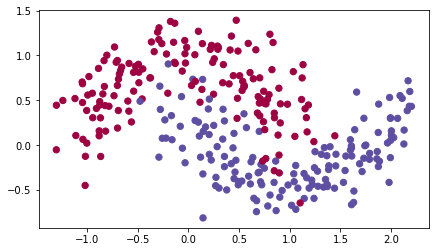

In [46]:
train_X, train_Y = load_dataset()

Chúng ta đã triển khai mạng nơ-ron 3 lớp. Bạn sẽ huấn luyện nó với:
- Mini-batch **Gradient Descent**: nó sẽ gọi hàm:
    - `update_parameters_with_gd()`
- Mini-batch **Momentum**: nó sẽ gọi hàm:
    - `initialize_velocity()` và `update_parameters_with_momentum()`
- Mini-batch **Adam**: nó sẽ gọi hàm:
    - `initialize_adam()` và `update_parameters_with_adam()`

In [47]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    """
    mô hình mạng nơ-ron 3 lớp có thể chạy ở các chế độ tối ưu khác nhau.
    
    Đối số:
    X -- dữ liệu đầu vào, có shape (2, số ví dụ)
    Y -- vectơ true "label" (1 cho chấm xanh / 0 cho chấm đỏ), có shape (1, số ví dụ)
    layers_dims -- python list, chứa kích thước của từng lớp
    learning_rate -- tốc độ học, số vô hướng.
    mini_batch_size -- kích thước của mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter cho ước tính gradient trước đó
    beta2 -- Exponential decay hyperparameter cho ước tính gradient bình phương trước đó
    epsilon -- hyperparameter ngăn chia cho 0 trong các cập nhật của Adam
    num_epochs -- số epoch
    print_cost -- True sẽ in ra cost sau mỗi 1000 epoch

    Trả về:
    parameters -- python ditionary chứa các tham số đã cập nhật
    """

    L = len(layers_dims)             # số lớp trong mạng nơ-ron
    costs = []                       # theo dõi cost
    t = 0                            # khởi tạo bộ đếm cần cho cập nhật Adam
    seed = 10                        # Với mục đích chấm điểm, các "random" minibatch của bạn cần tương tự với của chúng tôi
    
    # Khởi tạo tham số
    parameters = initialize_parameters(layers_dims)

    # Khởi tạo optimizer
    if optimizer == "gd":
        pass # không yêu cầu khởi tạo cho gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Vòng lặp tối ưu
    for i in range(num_epochs):
        
        # Xác định các random minibatch. Tăng seed để xáo trộn lại tập dữ liệu sau mỗi epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Chọn một minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Lan truyền xuôi
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Tính cost
            cost = compute_cost(a3, minibatch_Y)

            # Lan truyền ngược
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Cập nhật tham số
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        # In ra cost sau mỗi 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
                
    # vẽ biểu đồ của cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

Bây giờ bạn sẽ chạy mạng nơ-ron 3 lớp này với mỗi phương pháp trong số 3 phương pháp tối ưu hóa.

### 5.1 - Mini-batch Gradient descent

Chạy code sau để xem mô hình hoạt động như thế nào với mini-batch gradient descent. 

Cost after epoch 0: 0.690736
Cost after epoch 1000: 0.685273
Cost after epoch 2000: 0.647072
Cost after epoch 3000: 0.619525
Cost after epoch 4000: 0.576584
Cost after epoch 5000: 0.607243
Cost after epoch 6000: 0.529403
Cost after epoch 7000: 0.460768
Cost after epoch 8000: 0.465586
Cost after epoch 9000: 0.464518


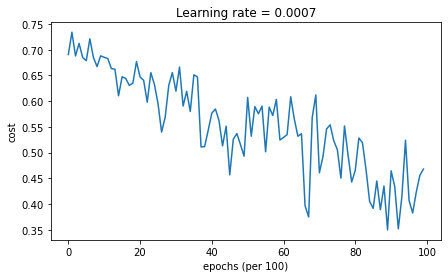

Accuracy: 0.7966666666666666


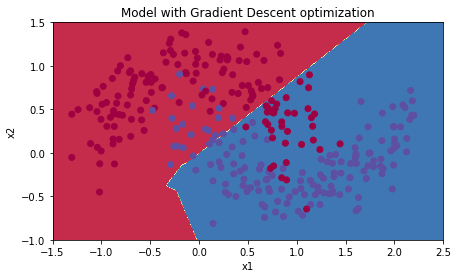

In [48]:
# huấn luyện mô hình 3 lớp
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Dự đoán
predictions = predict(train_X, train_Y, parameters)

# Vẽ biểu đồ ranh giới quyết định
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### 5.2 - Mini-batch gradient descent với momentum

Chạy đoạn code sau để xem mô hình hoạt động như thế nào với momentum. Bởi vì ví dụ này tương đối đơn giản nên lợi ích từ việc sử dụng momemtum khá là nhỏ; nhưng đối với các vấn đề phức tạp hơn, bạn sẽ thấy lợi ích lớn hơn. 

Cost after epoch 0: 0.690741
Cost after epoch 1000: 0.685341
Cost after epoch 2000: 0.647145
Cost after epoch 3000: 0.619594
Cost after epoch 4000: 0.576665
Cost after epoch 5000: 0.607324
Cost after epoch 6000: 0.529476
Cost after epoch 7000: 0.460936
Cost after epoch 8000: 0.465780
Cost after epoch 9000: 0.464740


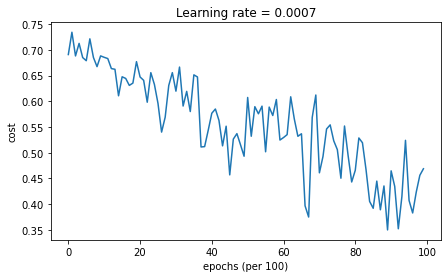

Accuracy: 0.7966666666666666


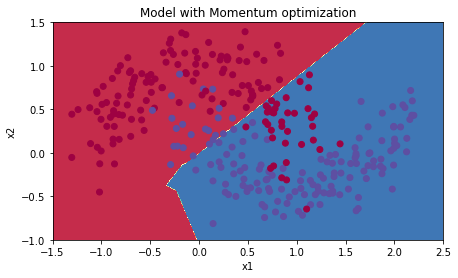

In [49]:
# huấn luyện mô hình 3 lớp
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Dự đoán
predictions = predict(train_X, train_Y, parameters)

# Vẽ biểu đồ ranh giới quyết định
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### 5.3 - Mini-batch với Adam mode

Chạy đoạn code sau để xem mô hình hoạt động như thế nào với Adam. 

Cost after epoch 0: 0.690433
Cost after epoch 1000: 0.370761
Cost after epoch 2000: 0.282847
Cost after epoch 3000: 0.147159
Cost after epoch 4000: 0.159227
Cost after epoch 5000: 0.123224
Cost after epoch 6000: 0.127093
Cost after epoch 7000: 0.042551
Cost after epoch 8000: 0.131159
Cost after epoch 9000: 0.213533


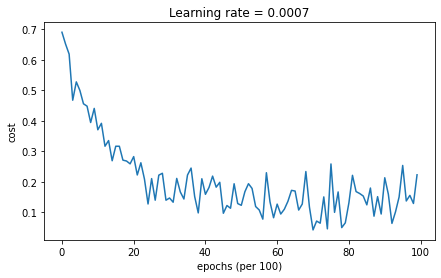

Accuracy: 0.9433333333333334


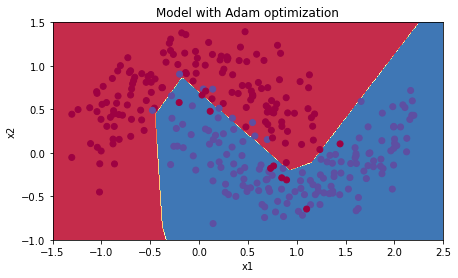

In [50]:
# huấn luyện mô hình 3 lớp
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Dự đoán
predictions = predict(train_X, train_Y, parameters)

# Vẽ biểu đồ ranh giới quyết định
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### 5.4 - Tóm lại

<table> 
    <tr>
        <td>
        **optimization method**
        </td>
        <td>
        **accuracy**
        </td>
        <td>
        **cost shape**
        </td>

    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        79.7%
        </td>
        <td>
        oscillations
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        79.7%
        </td>
        <td>
        oscillations
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        94%
        </td>
        <td>
        smoother
        </td>
    </tr>
</table> 

Momentum thường hữu ích, nhưng với learning rate nhỏ và tập dữ liệu đơn giản thì tác động của nó gần như không đáng kể. Ngoài ra, những dao động lớn mà bạn thấy trong cost thực tế là một số minibatch khó hơn những cái khác đối với thuật toán tối ưu hóa.

Mặt khác, Adam rõ ràng vượt trội hơn hẳn so với mini-batch gradient descent và Momentum. Nếu bạn chạy mô hình cho nhiều giai đoạn hơn trên tập dữ liệu đơn giản này, cả 3 phương pháp sẽ dẫn đến kết quả rất tốt. Tuy nhiên, bạn thấy rằng Adam hội tụ nhanh hơn rất nhiều.

Một số ưu điểm của Adam gồm:
- Yêu cầu bộ nhớ tương đối thấp (mặc dù cao hơn gradient descent và gradient descent với momentum)
- Thường hoạt động tốt ngay cả khi điều chỉnh ít hyperparameter (ngoại trừ $\alpha$) 

**Tham khảo**:

- Tài liệu về Adam: https://arxiv.org/pdf/1412.6980.pdf